# Artificial Neural Network

The Goal of this project is to **predict whether a bank customer will churn** using a structured dataset (Churn_Modelling.csv) and an Artificial Neural Network (ANN).

## Libraries and Data Importing

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


In [4]:
data=pd.read_csv("Churn_Modelling.csv")
data

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


## Data Preprocessing

In [6]:
data.drop(columns=["CustomerId" , "Surname" , "RowNumber"] , axis=1 , inplace=True)

In [7]:
data.isna().sum()

,0
CreditScore,0
Geography,0
Gender,0
Age,0
Tenure,0
Balance,0
NumOfProducts,0
HasCrCard,0
IsActiveMember,0
EstimatedSalary,0


In [8]:
data["Gender"].value_counts()

,count
Gender,
Male,5457
Female,4543


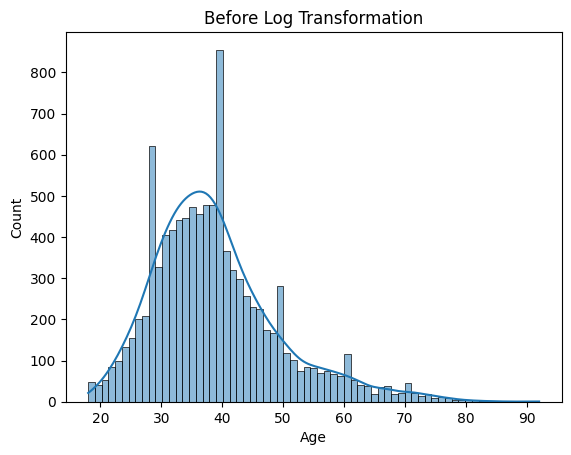

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(data['Age'], kde=True)
plt.title("Before Log Transformation")
plt.show()

From the plot, we can tell that the data is right-skewed, for that we apply log transformation to reduce the skewness.

<Axes: xlabel='Age', ylabel='Count'>

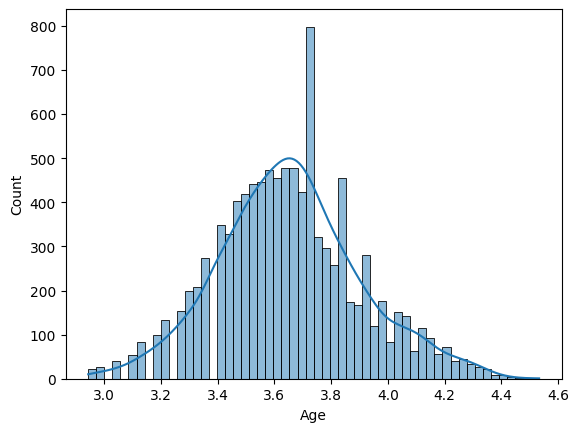

In [10]:
data["Age"]=np.log(data["Age"]+1)
sns.histplot(data["Age"],kde=True)

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  float64
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(3), int64(6), object(2)
memory usage: 859.5+ KB


##  Data Splitting

In [12]:
x=data.drop(columns=["Exited"],axis=1)
y=data["Exited"]

In [13]:
from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test = train_test_split(x,y,random_state=42 , shuffle=True , test_size=0.2)

In [14]:
num_features = x_train.select_dtypes(include=['number']).columns.tolist()
cat_features = x_train.select_dtypes(include=['object', 'category']).columns.tolist()

In [26]:
num_features

['CreditScore',
 'Age',
 'Tenure',
 'Balance',
 'NumOfProducts',
 'HasCrCard',
 'IsActiveMember',
 'EstimatedSalary']

In [28]:
cat_features

['Geography', 'Gender']

## Feature Scaling

In [16]:
from sklearn.preprocessing import StandardScaler , LabelEncoder , OneHotEncoder
from sklearn.compose import ColumnTransformer
# Scaling and Encoding Setup
scaler=StandardScaler()
encode=LabelEncoder()

In [17]:
# Column-wise Preprocessing
preprocessor = ColumnTransformer(transformers=[
    ('num', StandardScaler(), num_features),  # Scale numerical features
    ('cat', OneHotEncoder() , cat_features)  # One-hot encode categorical features
])
# Apply Preprocessing to Data
x_train=preprocessor.fit_transform(x_train)
x_test = preprocessor.transform(x_test)

## ANN Model Building

In [18]:
### The ann implentaion
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense , Dropout
from tensorflow.keras.callbacks import EarlyStopping

In [19]:
earlystopping=EarlyStopping(restore_best_weights=True , patience=10 , mode="min")

In [20]:
model=Sequential(
    [
        Dense(units=124 , activation="relu", input_shape=(x_train.shape[1],)),

        Dense(units=64 , activation="relu"),
        Dropout(0.3),

        Dense(1 , activation="sigmoid")
    ]
)

## Model Training

In [21]:
from tensorflow.keras.optimizers import Adam

In [22]:
model.compile( optimizer=Adam(learning_rate=0.01),
              loss="binary_crossentropy",
              metrics=["accuracy"]

)
history=model.fit(
    x_train ,
    y_train,
    callbacks=[earlystopping],
    epochs=100,
    batch_size=32,
    verbose=1
)

Epoch 1/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7981 - loss: 0.4527
Epoch 2/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8502 - loss: 0.3665
Epoch 3/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8565 - loss: 0.3520
Epoch 4/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8601 - loss: 0.3470
Epoch 5/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8584 - loss: 0.3431
Epoch 6/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8663 - loss: 0.3231
Epoch 7/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8641 - loss: 0.3396
Epoch 8/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8614 - loss: 0.3429
Epoch 9/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8554 - loss: 0.3479
Epoch 10/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8676 - loss: 0.3225
Epoch 11/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8595 - loss: 0.3420
Epoch 12/100
250/250 ━━━━━━━━━━━━━━━━━━━━

## Model Evaluation

In [23]:
test_loss , test_acc = model.evaluate(x_test , y_test)
print("test_loss", test_loss)
print('test_acc',test_acc)

63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8471 - loss: 0.6336
test_loss 0.6679235696792603
test_acc 0.8525000214576721


**Test Loss: ~0.689**→ The average loss on the test set; lower is better.

**Test Accuracy: ~0.8445** → Your model predicted correctly ~84.45% of the time on the test data.

The small difference between the live output (0.8419) and final printed result (0.8445) is normal — it could be due to rounding or slight changes in calculation once the full dataset is evaluated.

## Model Improvements
